# Stock purchase recommendations with Machine Learning

In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook # progress bar
import fastparquet

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.set_option('display.max_columns', 1500)

## Machine Learning

In [3]:
# load the df_Xy dataframe from feature engineering step:
df_Xy = fastparquet.ParquetFile('../data/interim/df_Xy_all_tickers_final.parq').to_pandas()

# split df into features and target (column setup_for_profitable_trade)
df_X = df_Xy.drop(columns=['setup_for_profitable_trade'])
df_y = df_Xy['setup_for_profitable_trade']

df_X.shape

(606, 75)

### Build Model

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, shuffle=False)

In [5]:
X_train.tail()

,AdjVolume_-1,AdjVolume_0,AdjOpen_-1,AdjOpen_0,AdjHigh_-1,AdjHigh_0,AdjLow_-1,AdjLow_0,AdjClose_-1,AdjClose_0,AdjCloseRSI14_-1,AdjCloseRSI14_0,RSI_above_80_-1,RSI_above_80_0,RSI_below_20_-1,RSI_below_20_0,AdjCloseSMA10_-1,AdjCloseSMA10_0,AdjCloseSMA10_to_AdjClose_ratio_-1,AdjCloseSMA10_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA10_-1,AdjClose_above_AdjCloseSMA10_0,AdjClose_crossed_AdjCloseSMA10_-1,AdjClose_crossed_AdjCloseSMA10_0,AdjCloseSMA50_-1,AdjCloseSMA50_0,AdjCloseSMA50_to_AdjClose_ratio_-1,AdjCloseSMA50_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA50_-1,AdjClose_above_AdjCloseSMA50_0,AdjClose_crossed_AdjCloseSMA50_-1,AdjClose_crossed_AdjCloseSMA50_0,AdjCloseSMA200_-1,AdjCloseSMA200_0,AdjCloseSMA200_to_AdjClose_ratio_-1,AdjCloseSMA200_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA200_-1,AdjClose_above_AdjCloseSMA200_0,AdjClose_crossed_AdjCloseSMA200_-1,AdjClose_crossed_AdjCloseSMA200_0,AdjCloseSMA50_to_AdjCloseSMA200_ratio_-1,AdjCloseSMA50_to_AdjCloseSMA200_ratio_0,AdjCloseSMA200_above_AdjCloseSMA50_-1,AdjCloseSMA200_above_AdjCloseSMA50_0,AdjCloseSMA200_crossed_AdjCloseSMA50_-1,AdjCloseSMA200_crossed_AdjCloseSMA50_0,AdjCloseSMA10_to_AdjCloseSMA50_ratio_-1,AdjCloseSMA10_to_AdjCloseSMA50_ratio_0,AdjCloseSMA50_above_AdjCloseSMA10_-1,AdjCloseSMA50_above_AdjCloseSMA10_0,AdjCloseSMA50_crossed_AdjCloseSMA10_-1,AdjCloseSMA50_crossed_AdjCloseSMA10_0,AdjVolume_chg_-1,AdjVolume_chg_0,AdjOpen_chg_-1,AdjOpen_chg_0,AdjLow_chg_-1,AdjLow_chg_0,AdjHigh_chg_-1,AdjHigh_chg_0,AdjClose_chg_-1,AdjClose_chg_0,AdjCloseSMA10_chg_-1,AdjCloseSMA10_chg_0,AdjCloseSMA50_chg_-1,AdjCloseSMA50_chg_0,AdjCloseSMA200_chg_-1,AdjCloseSMA200_chg_0,year,month,week,weekday,day,AAPL.US,INTC.US
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-10-01,1.005098,1.0,1.008379,1.0,1.006325,1.0,1.016844,1.0,1.024419,1.0,0.538357,0.433993,False,False,False,False,1.002861,1.0,0.996468,1.017888,True,False,False,True,1.000328,1.0,0.986166,1.009916,True,False,False,True,0.998184,1.0,0.812753,0.834114,True,True,False,False,1.213365,1.210764,False,False,False,False,1.010446,1.007894,False,False,False,False,0.216234,-0.005072,0.024662,-0.008309,0.013848,-0.016565,0.000286,-0.006286,-0.002292,-0.023837,-0.000317,-0.002853,0.000578,-0.000328,0.001939,0.001819,2014,10,40,2,1,0,1
2014-10-02,1.078175,1.0,1.013297,1.0,1.004690,1.0,1.006732,1.0,0.992793,1.0,0.467456,0.492621,False,False,False,False,1.001881,1.0,1.015185,1.005976,False,False,False,False,0.999356,1.0,0.999322,0.992759,True,True,False,False,0.998744,1.0,0.863970,0.858822,True,True,False,False,1.156663,1.155954,False,False,False,False,1.015873,1.013314,False,False,False,False,-0.068269,-0.072507,-0.002182,-0.013123,-0.018204,-0.006687,-0.008371,-0.004668,-0.015583,0.007260,-0.002378,-0.001877,0.000996,0.000644,0.001243,0.001258,2014,10,40,3,2,1,0
2014-10-02,1.066362,1.0,1.019140,1.0,1.022941,1.0,1.017438,1.0,1.014021,1.0,0.433993,0.388111,False,False,False,False,1.004792,1.0,1.017888,1.027237,False,False,True,False,1.000434,1.0,1.009916,1.023632,False,False,True,False,0.998297,1.0,0.834114,0.847252,True,True,False,False,1.210764,1.208178,False,False,False,False,1.007894,1.003523,False,False,False,False,-0.005072,-0.062232,-0.008309,-0.018781,-0.016565,-0.017139,-0.006286,-0.022427,-0.023837,-0.013828,-0.002853,-0.004769,-0.000328,-0.000434,0.001819,0.001706,2014,10,40,3,2,0,1
2014-10-03,1.273922,1.0,1.008913,1.0,0.994734,1.0,0.993726,1.0,0.985013,1.0,0.388111,0.455393,False,False,False,False,1.002300,1.0,1.027237,1.009521,False,False,False,False,0.999992,1.0,1.023632,1.008298,False,False,False,False,0.998246,1.0,0.847252,0.836021,True,True,False,False,1.208178,1.206068,False,False,False,False,1.003523,1.001213,False,False,False,False,-0.062232,-0.215023,-0.018781,-0.008834,-0.017139,0.006314,-0.022427,0.005294,-0.013828,0.015215,-0.004769,-0.002294,-0.000434,0.000008,0.001706,0.001757,2014,10,40,4,3,0,1
2014-10-03,1.098649,1.0,0.998290,1.0,1.000100,1.0,0.989903,1.0,1.002811,1.0,0.49

In [6]:
X_test.head()

,AdjVolume_-1,AdjVolume_0,AdjOpen_-1,AdjOpen_0,AdjHigh_-1,AdjHigh_0,AdjLow_-1,AdjLow_0,AdjClose_-1,AdjClose_0,AdjCloseRSI14_-1,AdjCloseRSI14_0,RSI_above_80_-1,RSI_above_80_0,RSI_below_20_-1,RSI_below_20_0,AdjCloseSMA10_-1,AdjCloseSMA10_0,AdjCloseSMA10_to_AdjClose_ratio_-1,AdjCloseSMA10_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA10_-1,AdjClose_above_AdjCloseSMA10_0,AdjClose_crossed_AdjCloseSMA10_-1,AdjClose_crossed_AdjCloseSMA10_0,AdjCloseSMA50_-1,AdjCloseSMA50_0,AdjCloseSMA50_to_AdjClose_ratio_-1,AdjCloseSMA50_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA50_-1,AdjClose_above_AdjCloseSMA50_0,AdjClose_crossed_AdjCloseSMA50_-1,AdjClose_crossed_AdjCloseSMA50_0,AdjCloseSMA200_-1,AdjCloseSMA200_0,AdjCloseSMA200_to_AdjClose_ratio_-1,AdjCloseSMA200_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA200_-1,AdjClose_above_AdjCloseSMA200_0,AdjClose_crossed_AdjCloseSMA200_-1,AdjClose_crossed_AdjCloseSMA200_0,AdjCloseSMA50_to_AdjCloseSMA200_ratio_-1,AdjCloseSMA50_to_AdjCloseSMA200_ratio_0,AdjCloseSMA200_above_AdjCloseSMA50_-1,AdjCloseSMA200_above_AdjCloseSMA50_0,AdjCloseSMA200_crossed_AdjCloseSMA50_-1,AdjCloseSMA200_crossed_AdjCloseSMA50_0,AdjCloseSMA10_to_AdjCloseSMA50_ratio_-1,AdjCloseSMA10_to_AdjCloseSMA50_ratio_0,AdjCloseSMA50_above_AdjCloseSMA10_-1,AdjCloseSMA50_above_AdjCloseSMA10_0,AdjCloseSMA50_crossed_AdjCloseSMA10_-1,AdjCloseSMA50_crossed_AdjCloseSMA10_0,AdjVolume_chg_-1,AdjVolume_chg_0,AdjOpen_chg_-1,AdjOpen_chg_0,AdjLow_chg_-1,AdjLow_chg_0,AdjHigh_chg_-1,AdjHigh_chg_0,AdjClose_chg_-1,AdjClose_chg_0,AdjCloseSMA10_chg_-1,AdjCloseSMA10_chg_0,AdjCloseSMA50_chg_-1,AdjCloseSMA50_chg_0,AdjCloseSMA200_chg_-1,AdjCloseSMA200_chg_0,year,month,week,weekday,day,AAPL.US,INTC.US
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-10-06,1.062153,1.0,0.985652,1.0,0.991299,1.0,0.988190,1.0,0.997655,1.0,0.455393,0.465324,False,False,False,False,1.001750,1.0,1.009521,1.005394,False,False,False,False,0.999946,1.0,1.008298,1.005988,False,False,False,False,0.998319,1.0,0.836021,0.835465,True,True,False,False,1.206068,1.204106,False,False,False,False,1.001213,0.999410,False,True,False,True,-0.215023,-0.058516,-0.008834,0.014557,0.006314,0.011951,0.005294,0.008777,0.015215,0.002351,-0.002294,-0.001747,0.000008,0.000054,0.001757,0.001683,2014,10,41,0,6,0,1
2014-10-06,1.173231,1.0,0.994897,1.0,0.995628,1.0,0.996178,1.0,1.000000,1.0,0.483061,0.483061,False,False,False,False,1.001437,1.0,1.007458,1.006013,False,False,False,False,0.999510,1.0,0.996166,0.996654,True,True,False,False,0.998708,1.0,0.862322,0.863437,True,True,False,False,1.155213,1.154287,False,False,False,False,1.011336,1.009390,False,False,False,False,-0.089791,-0.147653,0.001713,0.005129,0.010200,0.003837,-0.000100,0.004391,-0.002803,0.000000,-0.001333,-0.001435,0.000619,0.000490,0.001261,0.001294,2014,10,41,0,6,1,0
2014-10-07,0.936486,1.0,1.003231,1.0,1.012628,1.0,1.013617,1.0,1.019122,1.0,0.465324,0.402143,False,False,False,False,1.002778,1.0,1.005394,1.021781,False,False,False,False,1.000307,1.0,1.005988,1.024909,False,False,False,False,0.998432,1.0,0.835465,0.852777,True,True,False,False,1.204106,1.201849,False,False,False,False,0.999410,0.996947,True,True,True,False,-0.058516,0.067822,0.014557,-0.003221,0.011951,-0.013434,0.008777,-0.012471,0.002351,-0.018763,-0.001747,-0.002770,0.000054,-0.000307,0.001683,0.001570,2014,10,41,1,7,0,1
2014-10-07,0.880197,1.0,1.005230,1.0,1.005294,1.0,1.006989,1.0,1.008810,1.0,0.483061,0.451487,False,False,False,False,1.003897,1.0,1.006013,1.010937,False,False,False,False,0.999956,1.0,0.996654,1.005479,True,False,False,True,0.998709,1.0,0.863437,0.872170,True,True,False,False,1.154287,1.152847,False,False,False,False,1.009390,1.005428,False,False,False,False,-0.147653,0.136109,0.005129,-0.005203,0.003837,-0.006940,0.004391,-0.005266,0.000000,-0.008733,-0.001435,-0.003881,0.000490,0.000044,0.001294,0.001293,2014,10,41,1,7,1,0
2014-10-08,0.733288,1.0,1.006784,1.0,0.990209,1.0,1.004272,1.0,0.979663,1.0,0.451487,0.529522,False

In [7]:
pipeline = Pipeline([
    ('standardScaler', StandardScaler()),
    ('randomForest', RandomForestClassifier())
])
pipeline.get_params()

{'memory': None,
 'randomForest': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'randomForest__bootstrap': True,
 'randomForest__class_weight': None,
 'randomForest__criterion': 'gini',
 'randomForest__max_depth': None,
 'randomForest__max_features': 'auto',
 'randomForest__max_leaf_nodes': None,
 'randomForest__min_impurity_decrease': 0.0,
 'randomForest__min_impurity_split': None,
 'randomForest__min_samples_leaf': 1,
 'randomForest__min_samples_split': 2,
 'randomForest__min_weight_fraction_leaf': 0.0,
 'randomForest__n_estimators': 'warn',
 'randomForest__n_jobs': None,
 'randomForest__oob_score': F

In [8]:
pipeline.fit(X_train, y_train)

C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('standardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [9]:
y_pred = pipeline.predict(X_test)

C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.58      0.97      0.73        64
        True       0.87      0.22      0.36        58

   micro avg       0.61      0.61      0.61       122
   macro avg       0.72      0.60      0.54       122
weighted avg       0.72      0.61      0.55       122



In [11]:
accuracy_score(y_test, y_pred)

0.6147540983606558

In [12]:
confusion_matrix(y_test, y_pred, labels=[False, True])

array([[62,  2],
       [45, 13]], dtype=int64)

In [13]:
def print_feature_importances(estimator):

    importances = estimator.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X_train.shape[1]):
        print(str(f + 1) + " importance: " + str(importances[indices[f]]) + ". feature name: " + X_train.columns[indices[f]])
        
print_feature_importances(pipeline.named_steps['randomForest'])

Feature ranking:
1 importance: 0.07680922600785711. feature name: week
2 importance: 0.059876095719420375. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_-1
3 importance: 0.05027627616765538. feature name: AdjCloseSMA10_to_AdjCloseSMA50_ratio_0
4 importance: 0.04980708032506463. feature name: AdjCloseSMA200_to_AdjClose_ratio_-1
5 importance: 0.03911158790495807. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_0
6 importance: 0.03803944318877587. feature name: AdjCloseSMA10_-1
7 importance: 0.033621801925461194. feature name: AdjCloseSMA200_chg_-1
8 importance: 0.03320970262534958. feature name: AdjCloseSMA10_chg_0
9 importance: 0.03252432711310258. feature name: AdjCloseRSI14_0
10 importance: 0.031753225502578517. feature name: month
11 importance: 0.031230524505700775. feature name: AdjCloseSMA200_to_AdjClose_ratio_0
12 importance: 0.030953900898308406. feature name: AdjCloseSMA50_to_AdjClose_ratio_-1
13 importance: 0.030714297668307626. feature name: AdjCloseSMA200_-1
14 imp

### Improve RandomForest model

In [14]:
parameters = {
    'randomForest__min_samples_leaf': [1, 2, 5, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='f1', n_jobs=-1, verbose=6)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:    5.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.0s finished
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype bool

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'randomForest__min_samples_leaf': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=6)

In [15]:
cv.best_params_

{'randomForest__min_samples_leaf': 2}

In [16]:
print_feature_importances(cv.best_estimator_.named_steps['randomForest'])

Feature ranking:
1 importance: 0.06608632594588938. feature name: week
2 importance: 0.046406554388666685. feature name: AdjCloseSMA200_-1
3 importance: 0.046149579857793964. feature name: AdjCloseSMA200_chg_-1
4 importance: 0.0436615616340194. feature name: AdjCloseSMA10_chg_0
5 importance: 0.04172766308705857. feature name: AdjCloseSMA50_to_AdjClose_ratio_-1
6 importance: 0.04161682426785677. feature name: AdjCloseSMA200_to_AdjClose_ratio_0
7 importance: 0.04120135184493112. feature name: month
8 importance: 0.03898948993831977. feature name: AdjCloseSMA10_to_AdjClose_ratio_-1
9 importance: 0.038500015121111425. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_0
10 importance: 0.03522126365619237. feature name: AdjCloseSMA10_to_AdjClose_ratio_0
11 importance: 0.03152804472152167. feature name: AdjCloseSMA10_to_AdjCloseSMA50_ratio_0
12 importance: 0.031249762041079814. feature name: AdjCloseSMA200_chg_0
13 importance: 0.030506952418144762. feature name: AdjCloseSMA50_to_AdjClose_ra

In [17]:
y_pred = cv.predict(X_test)

C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.57      0.88      0.69        64
        True       0.65      0.26      0.37        58

   micro avg       0.58      0.58      0.58       122
   macro avg       0.61      0.57      0.53       122
weighted avg       0.61      0.58      0.54       122



In [19]:
accuracy_score(y_test, y_pred)

0.5819672131147541

In [20]:
confusion_matrix(y_test, y_pred, labels=[False, True])

array([[56,  8],
       [43, 15]], dtype=int64)

In [21]:
y_pred

array([False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

## next: add backtesting

In [22]:
# load the ticker list:
symbols = fastparquet.ParquetFile('../data/interim/symbols.parq').to_pandas().index.tolist()
    
print(symbols)

['AAPL.US', 'INTC.US']


In [23]:
# build dataframe with dates, stock tickers, real setup for profitable trade, and prediction
df_backtest = pd.concat([X_test.loc[:, symbols], y_test], axis=1)
df_backtest['setup_for_profitable_trade_prediction'] = y_pred
df_backtest.tail()

,AAPL.US,INTC.US,setup_for_profitable_trade,setup_for_profitable_trade_prediction
Index,,,,
2014-12-29,0,1,False,False
2014-12-30,1,0,False,False
2014-12-30,0,1,False,False
2014-12-31,0,1,False,False
2014-12-31,1,0,False,False


In [24]:
# load the df_downloaded_all_ticker dataframe from feature engineering step:
df_downloaded_all_tickers = fastparquet.ParquetFile('../data/interim/df_downloaded_all_tickers.parq').to_pandas()
df_downloaded_all_tickers.tail()

,AdjVolume,AdjOpen,AdjLow,AdjHigh,AdjClose,ticker
Index,,,,,,
2014-12-29,12203309.0,34.025018,33.770625,34.088616,33.779711,INTC.US
2014-12-30,29881477.0,107.958475,106.504969,108.224476,106.894471,AAPL.US
2014-12-30,15214093.0,33.688856,33.398122,33.788796,33.398122,INTC.US
2014-12-31,20393618.0,33.280011,32.971105,33.652514,32.971105,INTC.US
2014-12-31,41403351.0,107.179472,104.699961,107.473973,104.861462,AAPL.US


calculating backtest for: AAPL.US
            AAPL.US  setup_for_profitable_trade  \
Index                                             
2014-12-24        1                       False   
2014-12-26        1                       False   
2014-12-29        1                       False   
2014-12-30        1                       False   
2014-12-31        1                       False   

            setup_for_profitable_trade_prediction     AdjOpen    AdjClose  \
Index                                                                       
2014-12-24                                  False  106.951471  106.409968   
2014-12-26                                  False  106.495469  108.290977   
2014-12-29                                  False  108.100976  108.214976   
2014-12-30                                  False  107.958475  106.894471   
2014-12-31                                  False  107.179472  104.861462   

               AdjHigh      AdjLow   ticker  
Index                 

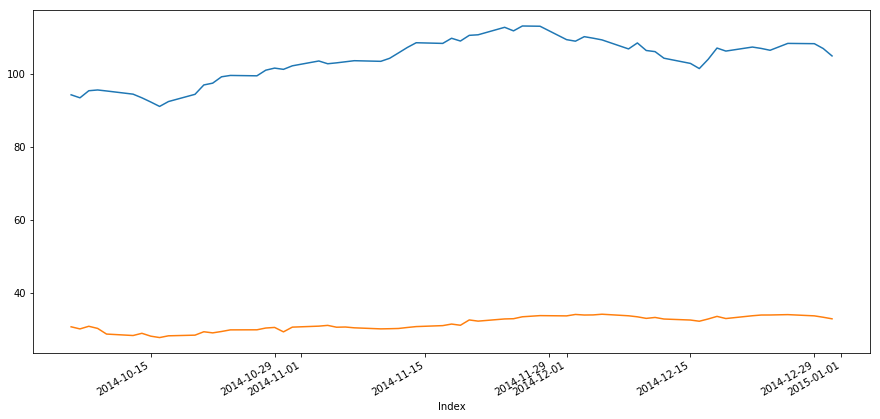

In [25]:
# cycle through all tickers and calculate performance of prediction for each
for ticker in tqdm_notebook(symbols):
    print('calculating backtest for: ' + ticker)
   
    # pull out all rows for current ticker 
    df_backtest_this_ticker = df_backtest.loc[df_backtest[ticker]==1, 
                                              [ticker, 'setup_for_profitable_trade', 'setup_for_profitable_trade_prediction']] 
    
    ##### 1) get the downloaded stock data for this ticker and for the dates that will be part of the backtest
       
    # pull out the data for current ticker
    df_downloaded_data_this_ticker = df_downloaded_all_tickers.loc[ df_downloaded_all_tickers['ticker']==ticker, :]
    # now ensure we only use the same dates as in the backtest for this ticker
    df_downloaded_data_this_ticker_backtest_dates = df_downloaded_data_this_ticker.loc[df_backtest_this_ticker.index, :]
    
    # ensure same dates in index
    assert (df_backtest_this_ticker.index == df_downloaded_data_this_ticker_backtest_dates.index).all
    # ensure we got the right rows from the downloaded data for this stock
    assert (ticker == df_downloaded_data_this_ticker_backtest_dates['ticker']).all
    
    # now that we know we have the right data, keep only most important columns
    df_downloaded_data_this_ticker_backtest_dates = df_downloaded_data_this_ticker_backtest_dates[['AdjOpen', 'AdjClose', 
                                                                                                  'AdjHigh', 'AdjLow', 'ticker']]
    
    # build dataframe that has downloaded data and prediction and true strategy result for backtest time period
    df_backtest_this_ticker_with_downloaded_data = df_backtest_this_ticker.join(df_downloaded_data_this_ticker_backtest_dates)
    
    # we now have the dataframe with the original stock price data and a prediction column
    
    print(df_backtest_this_ticker_with_downloaded_data.tail())
    df_backtest_this_ticker_with_downloaded_data['AdjClose'].plot(figsize=(15,7))

In [26]:
df_downloaded_all_tickers.loc[ df_downloaded_all_tickers['ticker']=='INTC.US', :].head()

,AdjVolume,AdjOpen,AdjLow,AdjHigh,AdjClose,ticker
Index,,,,,,
2013-10-18,29579100.0,20.809644,20.652656,20.914303,20.822727,INTC.US
2013-10-21,35297600.0,20.879417,20.770397,21.080013,21.049487,INTC.US
2013-10-22,29010800.0,21.080013,20.940468,21.106177,20.993669,INTC.US
2013-10-23,31651100.0,20.870695,20.547997,20.975354,20.700625,INTC.US
2013-10-24,47590200.0,20.809644,20.739872,20.905581,20.739872,INTC.US


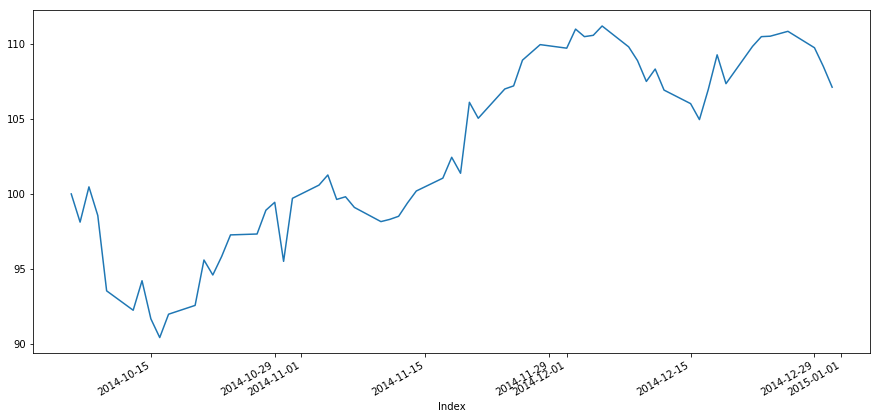

In [35]:
df_backtest_this_ticker_with_downloaded_data['normAdjClose'] = 100* df_backtest_this_ticker_with_downloaded_data['AdjClose'] / df_backtest_this_ticker_with_downloaded_data.AdjClose[0]
df_backtest_this_ticker_with_downloaded_data['normAdjClose'].plot(figsize=(15,7))

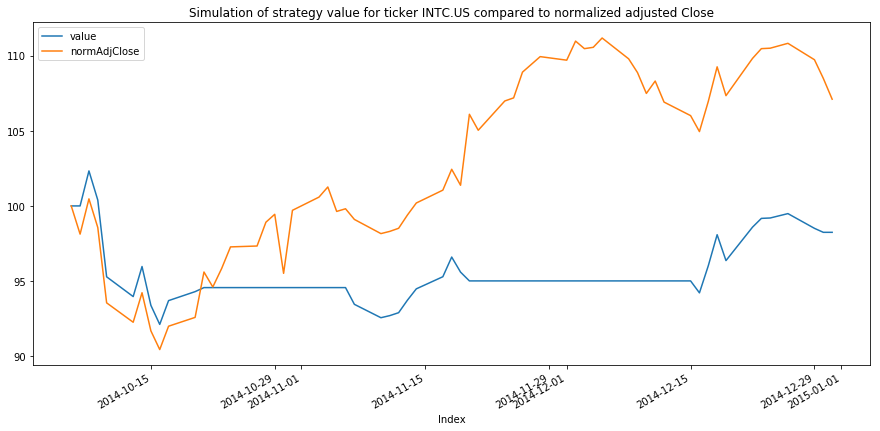

In [59]:
def calculate_backtest(backtest_df, signal_col_name, buy_on_day_plus_x, sell_on_day_plus_x):
    '''
    Calculates profit of strategy on the stock data given, starting cash is 100
    Strategy is hardcoded into function: buy on the open and sell on the open as controlled by parameters
    Go all in or all out, no partial positions and ignore additional long signals until exited position
    Inputs
        backtest_df - dataframe with Adjusted OHLC data
        signal_col_name - name of column used to trigger the execution of the stategy
        buy_on_day_plus_x - number of days after signal date on which the stock is purchased at the AdjOpen price
        sell_on_day_plus_x - number of dasy after signal date on which the stock is sold at the AdjOpen price
    Output
        backtest_df_with_profits
    '''
    # initial capital $100
    capital = 100
    backtest_df['capital'] = capital
    # initially don't own any of the stock
    stocks_owned = 0
    backtest_df['stocks_owned'] = stocks_owned
    # initially set to false:
    buy_stock_on_next_open = False
    sell_stock_on_next_open = False
    buy_in_x_days = -1
    sell_in_x_days = -1
    
    # loop through all dates in chronological order
    for date in  backtest_df.index:
        
        #set capital and stocks_owned for day to current state
        backtest_df.loc[date, 'capital'] = capital
        backtest_df.loc[date, 'stocks_owned'] = stocks_owned
        
        if (buy_in_x_days == 0) & (backtest_df.loc[date, 'stocks_owned'] == 0):
            # time to buy and currently not already owning the stock (otherwise skip signal and wait for sell)
            # buy today on the AdjOpen:
            # calculate number of shares
            print('buying now')
            backtest_df.loc[date, 'stocks_owned'] = backtest_df.loc[date, 'capital'] / backtest_df.loc[date, 'AdjOpen']
            # set capital to zero
            backtest_df.loc[date, 'capital'] = 0
        
        if (sell_in_x_days == 0) & (backtest_df.loc[date, 'capital'] == 0):
            # time to sell and have stocks to sell:
            # sell today on the AdjOpen:
            # calculate cash from sale of stock
            print('selling now')
            backtest_df.loc[date, 'capital'] = backtest_df.loc[date, 'stocks_owned'] * backtest_df.loc[date, 'AdjOpen']
            # set stocks owned to zero
            backtest_df.loc[date, 'stocks_owned'] = 0

        #set capital and stocks_owned for day to current state
        capital = backtest_df.loc[date, 'capital']
        stocks_owned = backtest_df.loc[date, 'stocks_owned']
        
        if (backtest_df.loc[date, signal_col_name] == True) & (backtest_df.loc[date, 'stocks_owned'] == 0):
            # we have a signal, set the counters for countdowns to buy and then sell
            buy_in_x_days = buy_on_day_plus_x
            sell_in_x_days = sell_on_day_plus_x
            
        buy_in_x_days += -1
        sell_in_x_days += -1    
        
        # calculate total value of cash and stock at close price
        backtest_df.loc[date, 'value'] = capital + stocks_owned * backtest_df.loc[date, 'AdjClose']

        '''print(date, backtest_df.loc[date, signal_col_name], 
                      buy_in_x_days, sell_in_x_days,
                      backtest_df.loc[date, 'capital'], 
                      backtest_df.loc[date, 'stocks_owned'],
                      backtest_df.loc[date, 'value'],
                      backtest_df.loc[date, 'AdjOpen'])
        '''
        return backtest_df
        
def show_chart_of_backtest_result(backtest_df):
    backtest_df[['value', 'normAdjClose']].plot(figsize=(15,7))
    plt.title('Simulation of strategy value for ticker ' + backtest_df.ticker[0] + ' compared to normalized adjusted Close')
    plt.show()  
    
        
backtest_df = df_backtest_this_ticker_with_downloaded_data
backtest_df = calculate_backtest(backtest_df, 'setup_for_profitable_trade_prediction', 1, 10)
show_chart_of_backtest_result(backtest_df)

In [29]:
df_backtest_this_ticker_with_downloaded_data.

SyntaxError: invalid syntax (<ipython-input-29-1b2044560080>, line 1)

## add simple cumulative portfolio value for each ticker. trade based on y_pred

## use TPOT